In [1]:
import numpy as np 
import astropy.units as u
from astropy.table import Table as aTable
# -- desi --
import desisim
import desimodel
# -- feasibgs --
from feasibgs import util as UT
from feasibgs import forwardmodel as FM

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

### Read in BOSS bright sky data

In [3]:
boss_blue = aTable.read(''.join([UT.dat_dir(), 'sky/', 'Bright_BOSS_Sky_blue.fits']))

(0.0, 1.0)

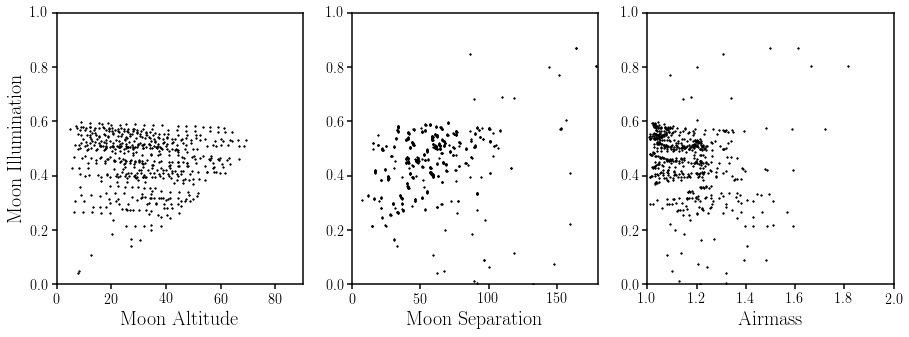

In [5]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(131)
sub.scatter(boss_blue['MOON_ALT'], boss_blue['MOON_ILL'], c='k', s=1)
sub.set_xlabel('Moon Altitude', fontsize=20)
sub.set_xlim([0., 90.])
sub.set_ylabel('Moon Illumination', fontsize=20)
sub.set_ylim([0., 1.])
sub = fig.add_subplot(132)
sub.scatter(boss_blue['MOON_SEP'], boss_blue['MOON_ILL'], c='k', s=1)
sub.set_xlabel('Moon Separation', fontsize=20)
sub.set_xlim([0., 180.])
sub.set_ylim([0., 1.])
sub = fig.add_subplot(133)
sub.scatter(boss_blue['AIRMASS'], boss_blue['MOON_ILL'], c='k', s=1)
sub.set_xlabel('Airmass', fontsize=20)
sub.set_xlim([1., 2.])
sub.set_ylim([0., 1.])

(0.0, 30)

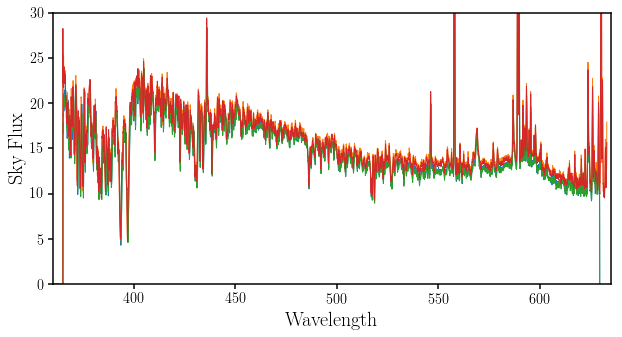

In [36]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i in range(4): 
    sub.plot(boss_blue['WAVE'][i], boss_blue['SKY'][i], c='C'+str(i), lw=1)
sub.set_xlabel('Wavelength', fontsize=20)
sub.set_xlim([360., 635])
sub.set_ylabel('Sky Flux', fontsize=20)
sub.set_ylim([0., 30])

In [7]:
blue_skyavg = np.array([np.average(sky[np.isfinite(sky)]) for sky in boss_blue['SKY']])
brightest = np.argmax(blue_skyavg)

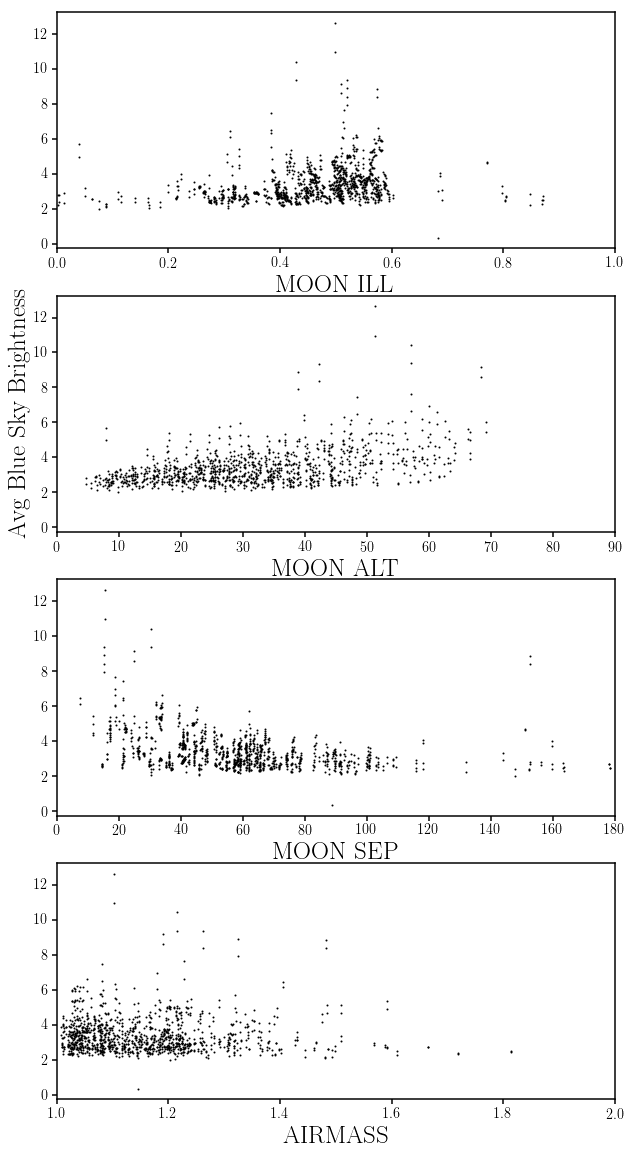

In [32]:
fig = plt.figure(figsize=(10, 20))
for i, k in enumerate(['MOON_ILL', 'MOON_ALT', 'MOON_SEP', 'AIRMASS']): 
    sub = fig.add_subplot(4,1,i+1)
    sub.scatter(boss_blue[k], blue_skyavg/np.pi, c='k', s=1)
    sub.set_xlabel(' '.join(k.split('_')), fontsize=25)
    if i == 0: 
        sub.set_xlim([0.,1.])
    elif i == 1: 
        sub.set_xlim([0., 90.])
        sub.set_ylabel('Avg Blue Sky Brightness', fontsize=25)
    elif i == 2: 
        sub.set_xlim([0., 180.])
    elif i == 3: 
        sub.set_xlim([1., 2.])

(0.0, 1.0)

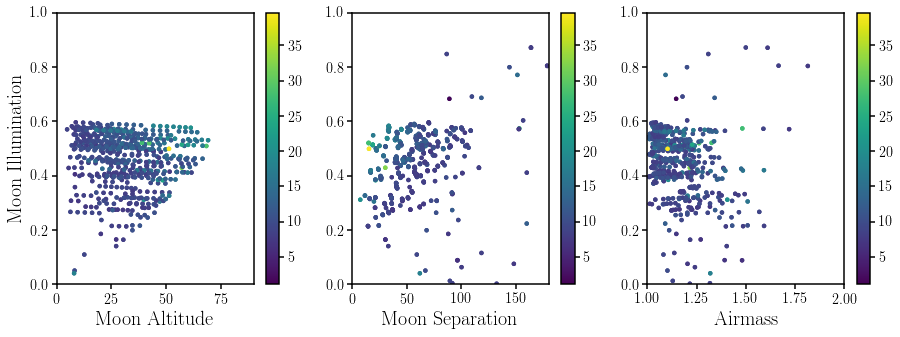

In [8]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(131)
c = sub.scatter(boss_blue['MOON_ALT'], boss_blue['MOON_ILL'], c=blue_skyavg, s=20, lw=0)
plt.colorbar(c)
sub.set_xlabel('Moon Altitude', fontsize=20)
sub.set_xlim([0., 90.])
sub.set_ylabel('Moon Illumination', fontsize=20)
sub.set_ylim([0., 1.])
sub = fig.add_subplot(132)
c = sub.scatter(boss_blue['MOON_SEP'], boss_blue['MOON_ILL'], c=blue_skyavg, s=20, lw=0)
plt.colorbar(c)
sub.set_xlabel('Moon Separation', fontsize=20)
sub.set_xlim([0., 180.])
sub.set_ylim([0., 1.])
sub = fig.add_subplot(133)
c = sub.scatter(boss_blue['AIRMASS'], boss_blue['MOON_ILL'], c=blue_skyavg, s=20, lw=0)
plt.colorbar(c)
sub.set_xlabel('Airmass', fontsize=20)
sub.set_xlim([1., 2.])
sub.set_ylim([0., 1.])

(0.0, 60)

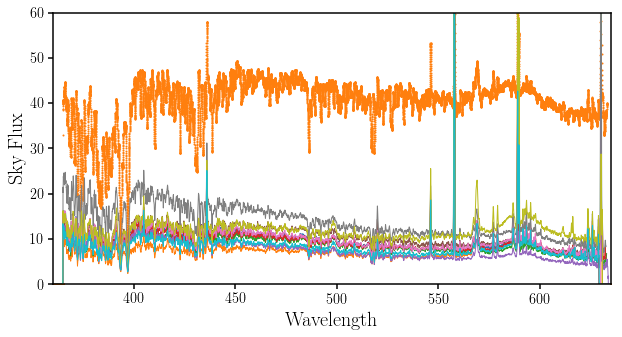

In [9]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i in np.random.choice(range(len(blue_skyavg)), 10, replace=False):
    sub.plot(boss_blue['WAVE'][i], boss_blue['SKY'][i], lw=1)
sub.scatter(boss_blue['WAVE'][brightest], boss_blue['SKY'][brightest], c='C1', s=1)
sub.set_xlabel('Wavelength', fontsize=20)
sub.set_xlim([360., 635])
sub.set_ylabel('Sky Flux', fontsize=20)
sub.set_ylim([0., 60])

In [10]:
boss_blue[brightest]

PLATE,IMG,OBJTYPE,MJD,TAI-BEG,TAI-END,RA,DEC,CAMERAS,AIRMASS,ALT,AZ,EXPTIME,SEEING20,SEEING50,SEEING80,RMSOFF20,RMSOFF50,RMSOFF80,DATE-OBS,REDDEN01,REDDEN02,REDDEN03,REDDEN04,REDDEN05,QUALITY,DUSTC,DUSTD,AIRTEMP,DEWPOINT,DUSTA,DUSTB,GUSTD,GUSTS,HUMIDITY,PRESSURE,WINDD,WINDS,OBS_ZENITH,ECL_LAT,ECL_LON,GAL_LAT,GAL_LON,ZODI,ISL,MOOND,MOON_SEP,MOON_ALT,MOON_AZ,MOON_ZENITH,MOON_ILL,MOON_PHASE,SUN_SEP,SUN_ALT,SUN_AZ,SUN_MOON_SEP,MONTH,SUN_SET,SUN_RISE,HOUR,PHOTO,SOLARFLUX,cont_b_615,NaID1,cont_b_380,cont_b_602,cont_b_565,cont_b_510,HgIc,cont_b_583,cont_b_460,NaID2,OI,NaIc,cont_b_480,HgIa,cont_b_425,cont_b_540,HgIb,cont_b_410,NaIb,NI,NaIa,cont_b_642,cont_b_740,cont_b_675,O2a,cont_b_1025,O2b,cont_b_920,cont_b_825,cont_b_710,cont_b_977,cont_b_873,OIr1,cont_b_720,OIr2,cont_b_833,sdss2010-u,sdss2010-g,sdss2010-r,sdss2010-i,sdss2010-z,bessell-U,bessell-B,bessell-V,bessell-R,bessell-I,SKY [27500],WAVE [27500]
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,,,,,,,,,,,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int32,int32,str8,float64,float64,float64,float64,float64,str8,float32,float64,float64,float32,float32,float32,float32,float64,float64,float64,str8,float64,float32,float32,float32,float32,str8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64
7240,172339,SK,56665.0,4895866424.0,4895867324.15,22.003138,21.602307,b2,1.10212,66.954,292.992,900.15,1.5374,1.6846,1.8176,0.00944549,0.0151986,0.0279428,20,0.2844,0.2093,0.1518,0.1151,0.0816,ex,-1.0,-1.0,0.4,-16.5,1273.0,405.0,289.1,15.0,26.8,21.41,271.2,11.7,23.046,11.491658676212744,28.39515747318367,-40.47273730468076,134.13129043706095,4.395768931420375,1.2854323494126372,378640.3751901304,15.476096393999654,51.34317953944032,236.9105504287714,38.656822,0.4984663138606456,1.5738637038836605,100.632312327193,-34.53647732964765,264.04449685697904,89.1278937546555,1,56665.00594526017,56665.59094725456,2.868167922543621,0.0,199.3132,38.266144,584.37244,27.580244,40.017216,41.762062,38.80743,514.43115,44.40923,44.113827,534.6473,1077.9244,487.40756,44.695312,456.10208,35.976852,39.392464,576.6535,36.119865,465.36005,438.08624,390.96463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.71208,18.933914,18.829308,20.718237,20.338417,19.718658,19.194822,18.601795,18.939709,20.118006,0.0 .. 0.0,360.00081082176786 .. 634.994526953067


In [11]:
for i in np.argsort(blue_skyavg)[::-1][:5]: 
    print '---'
    print 'moon altitude', boss_blue[i]['MOON_ALT']
    print 'moon separation', boss_blue[i]['MOON_SEP']
    print 'moon illumination', boss_blue[i]['MOON_ILL']
    print 'sun altitude', boss_blue[i]['SUN_ALT']
    print 'sun separation', boss_blue[i]['SUN_SEP']
    #print 'moon phase', boss_blue[i]['MOON_PHASE']

---
moon altitude 51.34317953944032
moon separation 15.476096393999654
moon illumination 0.4984663138606456
sun altitude -34.53647732964765
sun separation 100.632312327193
---
moon altitude 51.34326486907314
moon separation 15.476098806953193
moon illumination 0.4984662772531703
sun altitude -34.53637285533076
sun separation 100.6323126737437
---
moon altitude 57.20272038999257
moon separation 30.38576802051803
moon illumination 0.4288938497062961
sun altitude -16.99865636013286
sun separation 107.40732086090628
---
moon altitude 57.2027706700607
moon separation 30.385769775771916
moon illumination 0.4288938302575424
sun altitude -16.99860949420532
sun separation 107.40732102322893
---
moon altitude 42.26523768063965
moon separation 15.178704514394376
moon illumination 0.5193012775582323
sun altitude -47.77279426587489
sun separation 100.48999243842084


In [12]:
params = desimodel.io.load_desiparams()
wavemin = params['ccd']['b']['wavemin']
wavemax = params['ccd']['z']['wavemax']
w = wavemin + 0.1 * np.arange(int(wavemax - wavemin)*10)
config = desisim.simexp._specsim_config_for_wave(w, specsim_config_file='desi')
surface_brightness_dict = config.load_table(config.atmosphere.sky, 'surface_brightness', as_dict=True)
#extinction_coefficient = config.load_table(config.atmosphere.extinction, 'extinction_coefficient')
desi = FM.SimulatorHacked(config, num_fibers=1, camera_output=True)

In [13]:
def KS_sky(atbl): 
    #desi.atmosphere.moon.moon_phase = atbl['MOON_PHASE']/np.pi
    desi.atmosphere.moon.moon_phase = np.arccos(2.*atbl['MOON_ILL'] - 1)/np.pi
    desi.atmosphere.moon.moon_zenith = (90. - atbl['MOON_ALT']) * u.deg
    desi.atmosphere.airmass = atbl['AIRMASS']
    desi.atmosphere.moon.separation_angle = atbl['MOON_SEP'] * u.deg
    sbright_unit = u.erg / (u.arcsec**2 * u.Angstrom * u.s * u.cm ** 2 )
    return (surface_brightness_dict['dark'] + desi.atmosphere.moon.surface_brightness.value * sbright_unit)

[5.33780322 5.41984305 5.70718278 ... 1.24089557 1.16352525 1.0587473 ] 1e-17 erg / (Angstrom arcsec2 cm2 s)


(0.0, 20)

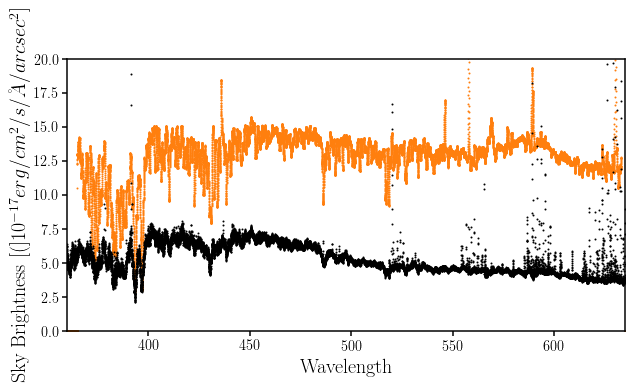

In [14]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.scatter(boss_blue['WAVE'][brightest], boss_blue['SKY'][brightest]/np.pi, c='C1', s=1)
KS_brightest = KS_sky(boss_blue[brightest])
print KS_brightest
sub.scatter(w/10., KS_brightest, c='k', s=1)
sub.set_xlabel('Wavelength', fontsize=20)
sub.set_xlim([360., 635])
sub.set_ylabel('Sky Brightness [(]$10^{-17} erg/cm^{2}/s/\AA/arcsec^2$]', fontsize=20)
sub.set_ylim([0., 20])

---
moon altitude 36.78835837125388
moon separation 21.77192558743499
moon illumination 0.5002113057107741
---
moon altitude 36.78835837125388
moon separation 21.77192558743499
moon illumination 0.5002113057107741
---
moon altitude 38.692096631545006
moon separation 21.884090594088775
moon illumination 0.49895648424489353


Text(0.5,0,'Wavelength')

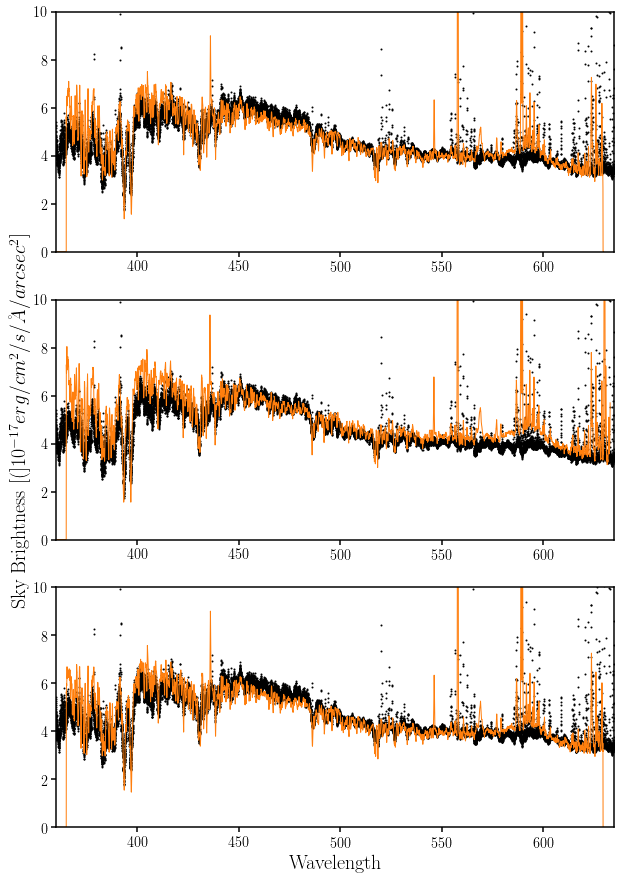

In [44]:
fig = plt.figure(figsize=(10,15))
for ii, i in enumerate([0, 1, 2]):#np.random.choice(range(len(blue_skyavg)), 3, replace=False)):
    print '---'
    print 'moon altitude', boss_blue[i]['MOON_ALT']
    print 'moon separation', boss_blue[i]['MOON_SEP']
    print 'moon illumination', boss_blue[i]['MOON_ILL']
    sub = fig.add_subplot(3,1,ii+1)
    sub.plot(boss_blue['WAVE'][i], boss_blue['SKY'][i]/np.pi, lw=1, c='C1')
    KS_i = KS_sky(boss_blue[i])
    sub.scatter(w/10., KS_i, s=1, c='k')
    sub.set_xlim([360., 635])
    if ii == 1: 
        sub.set_ylabel('Sky Brightness [(]$10^{-17} erg/cm^{2}/s/\AA/arcsec^2$]', fontsize=20)
    sub.set_ylim([0., 10])
sub.set_xlabel('Wavelength', fontsize=20)

In [37]:
wlim = ((boss_blue[0]['WAVE'] > 450.) & (boss_blue[0]['WAVE'] < 470.))
blue450 = np.array([np.average(boss_blue[i]['SKY'][wlim])/np.pi for i in range(len(boss_blue))])

In [39]:
ks_wlim = ((w > 4500.) & (w < 4700.))
def KS_sky450(atbl): 
    #desi.atmosphere.moon.moon_phase = atbl['MOON_PHASE']/np.pi
    desi.atmosphere.moon.moon_phase = np.arccos(2.*atbl['MOON_ILL'] - 1)/np.pi
    desi.atmosphere.moon.moon_zenith = (90. - atbl['MOON_ALT']) * u.deg
    desi.atmosphere.airmass = atbl['AIRMASS']
    desi.atmosphere.moon.separation_angle = atbl['MOON_SEP'] * u.deg
    sbright_unit = u.erg / (u.arcsec**2 * u.Angstrom * u.s * u.cm ** 2 )
    sbright = surface_brightness_dict['dark'] + desi.atmosphere.moon.surface_brightness.value * sbright_unit
    return np.average(sbright.value[ks_wlim])

In [45]:
ks450 = np.array([KS_sky450(boss_blue[i]) for i in range(len(boss_blue))])

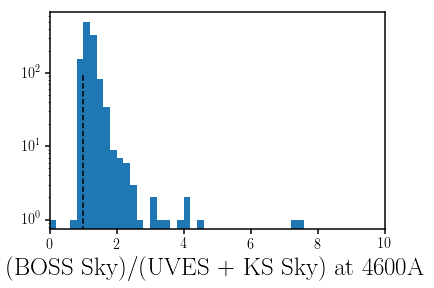

In [57]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.hist(blue450/ks450, range=(0., 10.), bins=50)
sub.vlines(1., 0., 100., color='k', linestyle='--')
sub.set_xlabel('(BOSS Sky)/(UVES + KS Sky) at 4600A', fontsize=25)
sub.set_xlim([0., 10.])
sub.set_yscale("log")

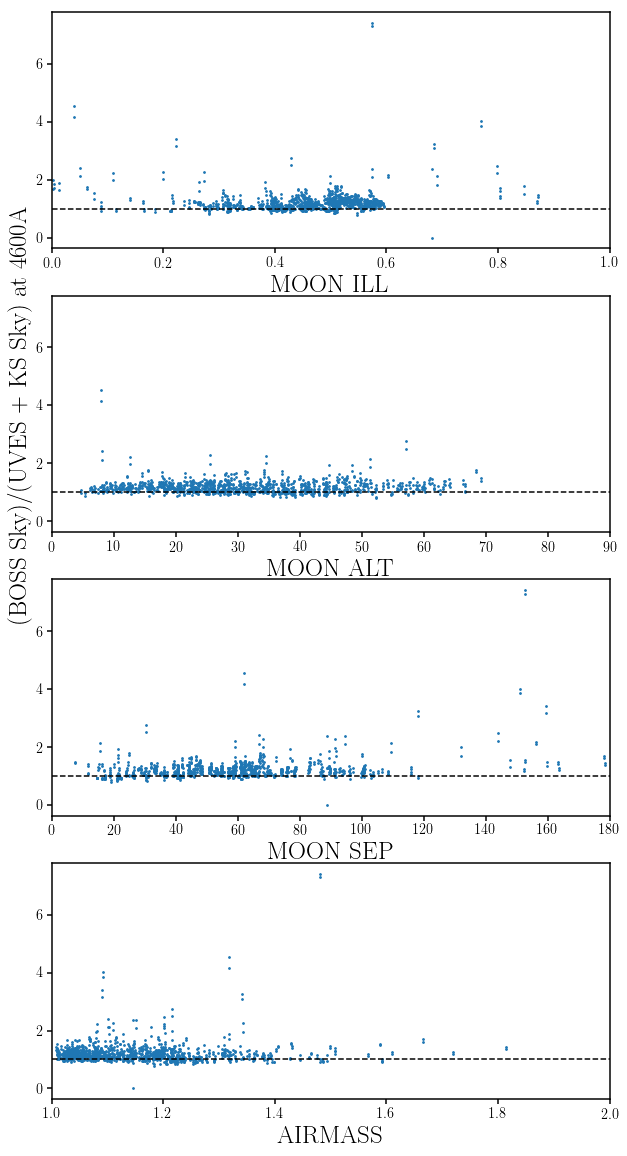

In [67]:
fig = plt.figure(figsize=(10, 20))
for i, k in enumerate(['MOON_ILL', 'MOON_ALT', 'MOON_SEP', 'AIRMASS']): 
    sub = fig.add_subplot(4,1,i+1)
    sub.scatter(boss_blue[k], blue450/ks450, c='C0', s=3)
    sub.set_xlabel(' '.join(k.split('_')), fontsize=25)
    if i == 0: 
        sub.set_xlim([0.,1.])
    elif i == 1: 
        sub.set_xlim([0., 90.])
        sub.set_ylabel('(BOSS Sky)/(UVES + KS Sky) at 4600A', fontsize=25)
    elif i == 2: 
        sub.set_xlim([0., 180.])
    elif i == 3: 
        sub.set_xlim([1., 2.])
    sub.plot(sub.get_xlim(), [1., 1.], color='k', linestyle='--')

In [65]:
sub.get_xlim()

(1.0, 2.0)